# Mattermost Lunch Channel  History - Part I: Data Collection

## Tasks

In this first part of the Mattermost Lunch Channel History Dojo, we aim to retrieve the data from the "lunch" channel for further analysis through the Mattermost API. The concrete goal of this session is to create a file (or multiple files) that contain all of the history of the lunch channel in a suitable format for further analysis (e.g. json or csv). Importantly, the data needs to contain the information, **who** posted **when** and **what**, together with the information **who** reacted to the post with **which** emoji(s). :pizza: :+1: :-1: :rocket: :cry:

## Setup

### Installation

In [3]:
!pip install --user -q mattermostdriver


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


### Package Imports

In [4]:
import random
from mattermostdriver import Driver
from getpass import getpass

### Group Rotation :memo:

In [5]:
# enter the names of your group (comma separated) and update the seed if you like
names = "Robin,Mike,Markus,Jana,Andi"
random.seed(40)
names = names.split(",")
random.shuffle(names)
rotation = " → ".join(names)
rotation

'Markus → Mike → Andi → Robin → Jana'

### Connection to Mattermost

In order to access Mattermost, the valid token of a user is required. In order to generate a token, one member of each group needs to download the `login.sh` script and run it locally. Provide your username and password there, a file `.token` will be created in your current directory. This token can be entered in the input field that appears when you run the next code cell.

:warning: all API actions are performed as the user who provides the token. Please use it responsibly. The user who created the token should run `logout.sh` locally, in order to invalidate the token after the session.

In [6]:
mm = Driver({
    'url': 'cctb-intern.biologie.uni-wuerzburg.de',
    'token': getpass("Enter token: "),
    'port': 443})
mm.login()

Enter token:  

{'id': '8gtq7te3ii8k3dat8gougi6ikh',
 'create_at': 1498818560044,
 'update_at': 1719998533321,
 'delete_at': 0,
 'username': 'iimog',
 'auth_data': '',
 'auth_service': '',
 'email': 'markus.ankenbrand@uni-wuerzburg.de',
 'email_verified': True,
 'nickname': '',
 'first_name': 'Markus',
 'last_name': 'Ankenbrand',
 'position': '',
 'roles': 'system_user',
 'allow_marketing': True,
 'props': {'customStatus': '{"emoji":"back","text":"","duration":"this_week","expires_at":"2024-06-15T21:59:59.999Z"}',
  'last_search_pointer': '2'},
 'notify_props': {'channel': 'true',
  'comments': 'never',
  'desktop': 'all',
  'desktop_duration': '5',
  'desktop_sound': 'true',
  'email': 'false',
  'first_name': 'false',
  'mention_keys': 'iimog',
  'push': 'mention',
  'push_status': 'online',
  'user_id': '8gtq7te3ii8k3dat8gougi6ikh'},
 'last_password_update': 1499240959099,
 'last_picture_update': 1499243140269,
 'locale': 'en',
 'timezone': {'automaticTimezone': 'Europe/Berlin',
  'manualTimezone':

Now look at the:
- [Mattermost API documentation](https://api.mattermost.com/)
- [Mattermost python driver documentation](https://vaelor.github.io/python-mattermost-driver/)

In [8]:
mm.users.get_stats()

{'total_users_count': 440}

In [15]:
mm.teams.get_team_by_name("CCTB")

{'id': '4izweae3eigapetc3b4stqkgna',
 'create_at': 1498811058402,
 'update_at': 1558555317773,
 'delete_at': 0,
 'display_name': 'CCTB',
 'name': 'cctb',
 'description': '',
 'email': 'mail@sonja-hohlfeld.de',
 'type': 'O',
 'company_name': '',
 'allowed_domains': '',
 'invite_id': 'yg6m1911ot8djkajhqgigfw6xy',
 'allow_open_invite': False,
 'last_team_icon_update': 1558555317773,
 'scheme_id': None,
 'group_constrained': None,
 'policy_id': None,
 'cloud_limits_archived': False}

In [16]:
team_id = "4izweae3eigapetc3b4stqkgna"

In [18]:
lunch_json = mm.channels.get_channel_by_name(team_id=team_id, channel_name="lunch")

In [21]:
type(lunch_json)

dict

In [23]:
lunch_json

{'id': 'h3azbb4yejd69kg68kdmqiw53r',
 'create_at': 1499152209696,
 'update_at': 1689242463847,
 'delete_at': 0,
 'team_id': '4izweae3eigapetc3b4stqkgna',
 'type': 'O',
 'display_name': 'lunch',
 'name': 'lunch',
 'header': '[cooking](https://hackmd.io/PhOpF6VoQN2D9Mg6R3K9bQ?view) - [gather](https://gather.town/app/r4oLVM25VSqeXimY/CCTB)',
 'purpose': 'How to organize lunch :)',
 'last_post_at': 1719910676224,
 'total_msg_count': 6906,
 'extra_update_at': 1533632808244,
 'creator_id': '',
 'scheme_id': None,
 'props': None,
 'group_constrained': None,
 'shared': None,
 'total_msg_count_root': 6971,
 'policy_id': None,
 'last_root_post_at': 1719910676224}

In [24]:
lunch_m = mm.posts.get_posts_for_channel("h3azbb4yejd69kg68kdmqiw53r")

In [28]:
lunch_m

In [26]:
len(lunch_m["order"])

60

In [27]:
6971/60

116.18333333333334

In [29]:
list_keys = ["user_id", "message", "create_at", "metadata"]

In [31]:
lunch_data = []
for i in range(117):
    lunch_data.append(mm.posts.get_posts_for_channel("h3azbb4yejd69kg68kdmqiw53r", params={"page":i})["posts"])

In [35]:
lunch_data = [list(x.values()) for x in lunch_data]

In [39]:
lunch_data = sum(lunch_data, [])

In [43]:
lunch_data[-1]

{'id': 'yygrg8xs1jn6d8c1zqg5xcmboh',
 'create_at': 1462356302000,
 'update_at': 1462356302000,
 'edit_at': 0,
 'delete_at': 0,
 'is_pinned': False,
 'user_id': 'zhcza6utdjbddq3tkcr9pwhunc',
 'channel_id': 'h3azbb4yejd69kg68kdmqiw53r',
 'root_id': '',
 'original_id': '',
 'message': 'kommt noch jemand mit?',
 'type': '',
 'props': {},
 'hashtags': '',
 'pending_post_id': '',
 'reply_count': 0,
 'last_reply_at': 0,
 'participants': None,
 'metadata': {}}

In [45]:
import pandas as pd

In [81]:
lunch_df = pd.DataFrame(lunch_data)
lunch_df

,id,create_at,update_at,edit_at,delete_at,is_pinned,user_id,channel_id,root_id,original_id,...,type,props,hashtags,pending_post_id,reply_count,last_reply_at,participants,metadata,file_ids,has_reactions
0,13yo1tsrnid15bd3tohgqgnash,1719305873100,1719305873100,0,0,False,xiomf453pfnuxqix7yrpxyhyrr,h3azbb4yejd69kg68kdmqiw53r,,,...,system_join_channel,{'username': 'jannis_witte'},,,0,0,None,{},NaN,NaN
1,1f77hkb68py5ukuzfdcw1j8mty,1715935781173,1715936603441,0,0,False,yhmko9aeb7nszc8h1oobfct1xw,h3azbb4yejd69kg68kdmqiw53r,,,...,,{'disable_group_highlight': True},,,0,0,None,{'files': [{'id': 'mqs611s1jfng7ywfhgewadedsy'...,[mqs611s1jfng7ywfhgewadedsy],True
2,35tzkq6b7j8wj8tyq14etq9bka,1714641187878,1714641211385,0,0,False,yjzjdkydhinrxjff1jnhifz4ne,h3azbb4yejd69kg68kdmqiw53r,,,...,,{'disable_group_highlight': True},,,0,0,None,{'reactions': [{'user_id': 'xxg7ytrh9idsdci9zo...,NaN,True
3,3jqtuj71qpda8dse6tjnhdeq4c,1715606274553,1715606652773,0,0,False,ajs477544if7ip5r5yawkitf3e,h3azbb4yejd69kg68kdmqiw53r,,,...,,{'disable_group_highlight': True},,,0,0,None,{'reactions': [{'user_id': '6fhkr7yz47fo5czpsh...,NaN,True
4,5hbfj51hjfrsprqq8koacfk18w,1718269643481,1718269643481,0,0,False,t4hkob8r5bnn3kc6m5gp6858he,h3azbb4yejd69kg68kdmqiw53r,,,...,,{'disable_group_highlight': True},,,0,0,None,{'files': [{'id': '78us3dnftirwufg36z8yu6fs6w'...,[78us3dnftirwufg36z8yu6fs6w],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,xemeqrs73prkdf8a4hxoienhhr,1462874379000,1462874379000,0,0,False,exh6xby887y4bfcydwu4yxrseh,h3azbb4yejd69kg68kdmqiw53r,,,...,,{},,,0,0,None,{},NaN,NaN
7020,xu4rdwgbajr4fgzqwqzgg3n96c,1462354278000,1462354278000,0,0,False,xuzzcgkghb8nzj45w3q4mmuohe,h3azbb4yejd69kg68kdmqiw53r,,,...,,{},,,0,0,None,{},NaN,NaN
7021,yegrfqjsaibnt8q9umotho5dqc,1462874152000,1462874152000,0,0,False,mix7yh94hbyn7fzfetj6t7x3jr,h3azbb4yejd69kg68kdmqiw53r,,,...,,{},,,0,0,None,{},NaN,NaN
7022,yepxejb3ejnj9nmsb75eod1bga,1462354247000,1462354247000,0,0,False,zhcza6utdjbddq3tkcr9pwhunc,h3azbb4yejd69kg68kdmqiw53r,,,...,,{},,,0,0,None,{},NaN,NaN


In [82]:
lunch_df["create_at"]

0       1719305873100
1       1715935781173
2       1714641187878
3       1715606274553
4       1718269643481
            ...      
7019    1462874379000
7020    1462354278000
7021    1462874152000
7022    1462354247000
7023    1462356302000
Name: create_at, Length: 7024, dtype: int64

In [83]:
lunch_df.type.value_counts()

type
                         6863
system_join_channel       103
system_leave_channel       29
system_add_to_channel      26
system_header_change        3
Name: count, dtype: int64

In [87]:
import datetime
import pytz

In [85]:
datetime.datetime.fromtimestamp(1462356302)

datetime.datetime(2016, 5, 4, 10, 5, 2)

In [86]:
lunch_df["create_at"] = lunch_df["create_at"]/1000

In [88]:
timezone = pytz.timezone('Europe/Berlin')

In [92]:
lunch_df["create_at_gmt"] = lunch_df["create_at"].map(lambda x: datetime.datetime.fromtimestamp(x, tz=timezone))

In [120]:
import numpy as np
np.arange(8,19,.5)

array([ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. ,
       13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5])

<Axes: ylabel='Frequency'>

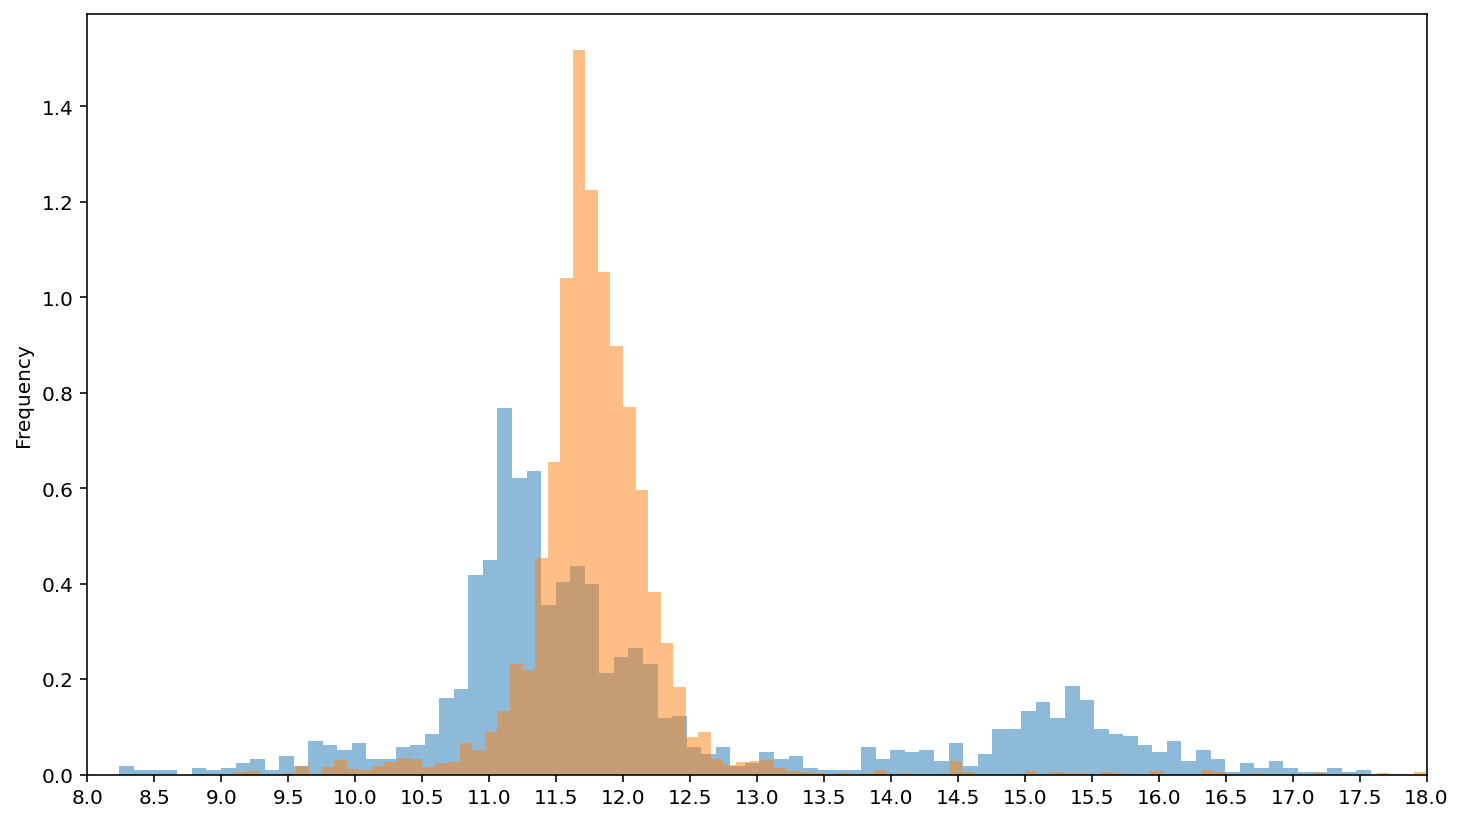

In [129]:
lunch_df["create_at_gmt"][lunch_df["create_at_gmt"].map(lambda x: x.year) > 2020].map(lambda x: x.hour + x.minute/60).plot.hist(bins=150, xlim=(8,18), xticks=np.arange(8,19,.5), alpha=.5, density=True)
lunch_df["create_at_gmt"][lunch_df["create_at_gmt"].map(lambda x: x.year) <= 2020].map(lambda x: x.hour + x.minute/60).plot.hist(bins=150, xlim=(8,18), xticks=np.arange(8,19,.5), alpha=.5, density=True)

<Axes: ylabel='Frequency'>

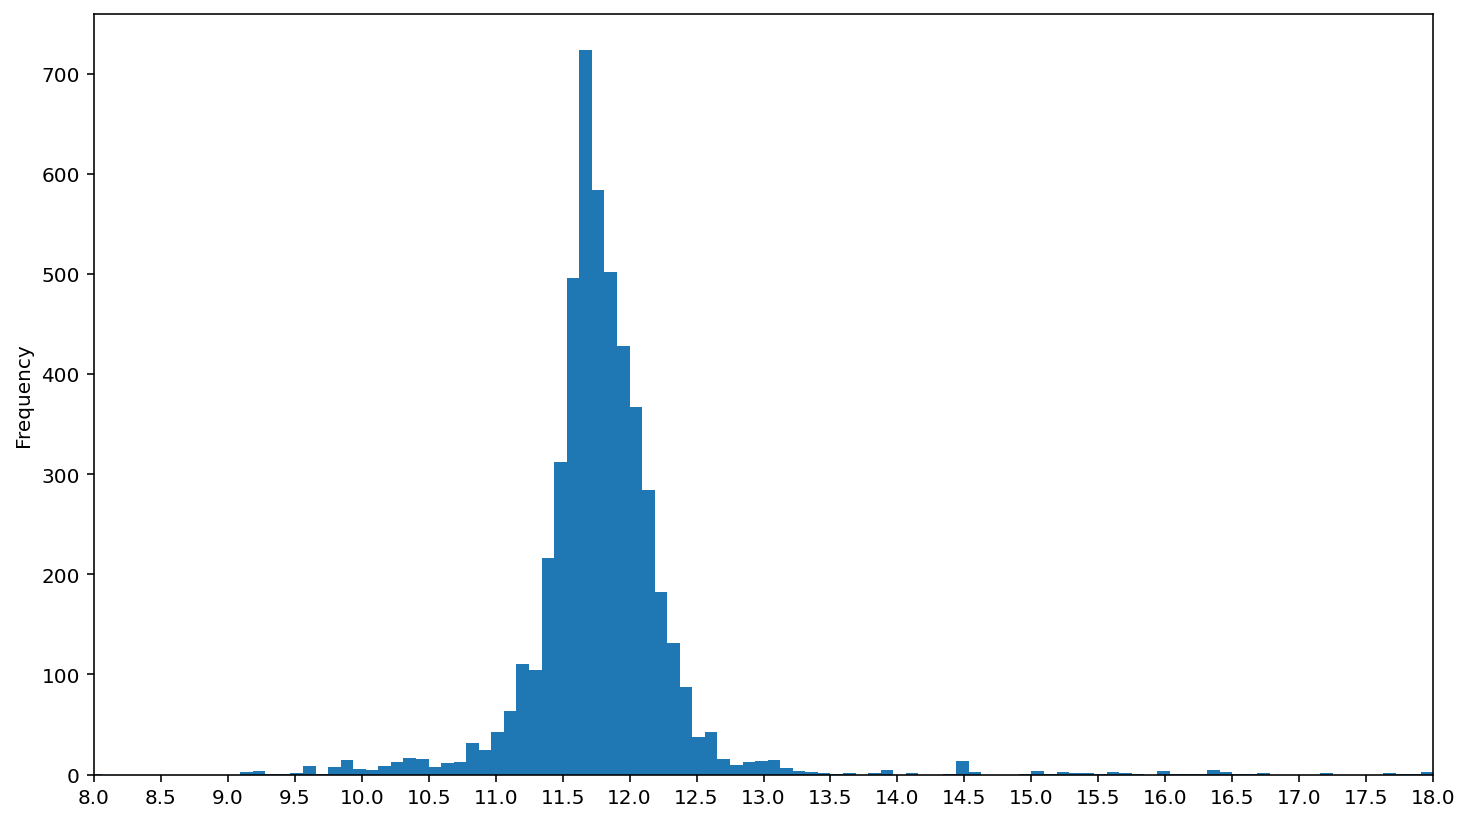

In [121]:
lunch_df["create_at_gmt"][lunch_df["create_at_gmt"].map(lambda x: x.year) <= 2020].map(lambda x: x.hour + x.minute/60).plot.hist(bins=150, xlim=(8,18), xticks=np.arange(8,19,.5))

<Axes: ylabel='Frequency'>

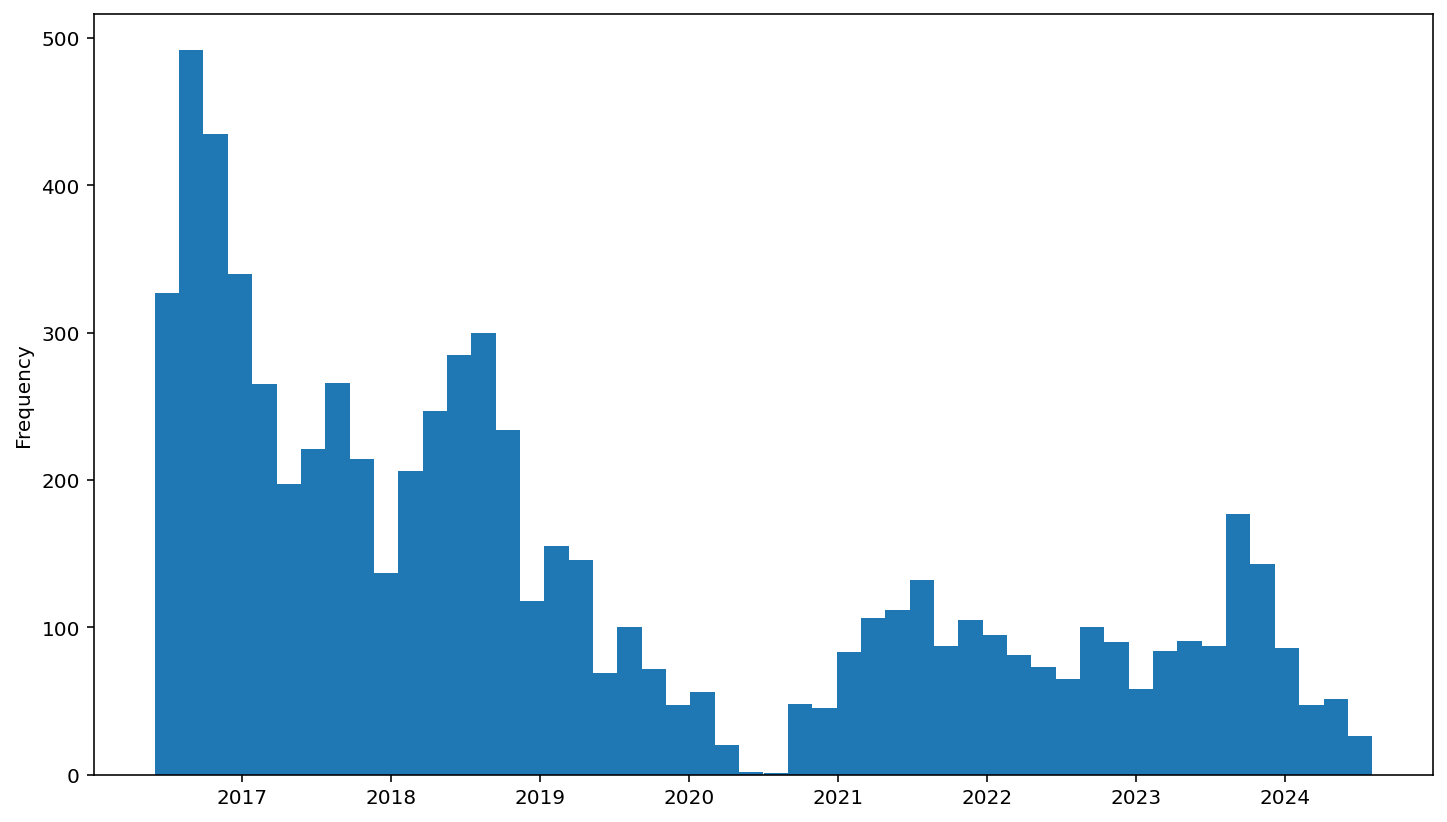

In [134]:
lunch_df["create_at_gmt"].map(lambda x: x.year + x.month/12).plot.hist(bins=50)

In [124]:
before_or_after = lunch_df["create_at_gmt"].map(lambda x: x.year) > 2020

In [125]:
before_or_after

0        True
1        True
2        True
3        True
4        True
        ...  
7019    False
7020    False
7021    False
7022    False
7023    False
Name: create_at_gmt, Length: 7024, dtype: bool